### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


### Дисциплина: Информационный анализ данных

##### Студент:  Ильин Никита 
##### Группа:   НФИбд-01-19

## Москва 2022
***

Вариант 5 

Credit Approval Data Set 

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Credit+Approval 

Класс: A16 (столбец No 16) 

Зависимая переменная: A8 (столбец No 8) 

Метод обработки пропущенных значений – медиана класса 

Метод обработки выбросов – алгоритм кластеризации DBSCAN 

Метод снижения размерности данных – регрессия лассо (Lasso) 

Регрессоры: 

⁃            Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃            регрессия лассо (Lasso), параметр alpha в диапазоне от 0.5 до 1.5 

⁃            регрессия на основе деревьев решений (DecisionTreeRegressor), параметр max_leaf_nodes в диапазоне от 5 до 10 

Показатели качества регрессии: 

⁃            Для определения лучшего регрессора MSPE 

⁃            Для визуализации кривой обучения MaxErr 

 

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

2.	Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 

3.	Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 

4.	Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

6.	Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

7.	Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

8.	Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.


1.	Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).


In [393]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [394]:
columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
data = pd.read_csv('crx.data', header=None, names = columns)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-



2.	Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 


In [395]:
data['A16'].isnull().sum(axis=0)

0

In [396]:
data['A8'].isnull().sum(axis=0)

0

In [397]:
data = data.replace('?', np.NaN)

Заменяю "+" на 1, а "-" на 0

In [398]:
data = data.replace('-', 0)
data = data.replace('+', 1)

In [399]:
data = data[['A2', 'A3', 'A8', 'A14', 'A15', 'A16']]

In [400]:
data = data.astype('float')
data.dtypes

A2     float64
A3     float64
A8     float64
A14    float64
A15    float64
A16    float64
dtype: object


3.	Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 


In [401]:
data.isnull().sum(axis=0)

A2     12
A3      0
A8      0
A14    13
A15     0
A16     0
dtype: int64

Метод обработки пропущенных значений – медиана класса

In [402]:
data = data.fillna(data.median(numeric_only=True))


4.	Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 


In [403]:
X = data[['A2','A3','A14','A15']]
Y = data['A16']

In [404]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X))
X.rename(columns={0: 'A2', 1: 'A3', 2:'A14', 3: 'A15'}, inplace=True)
X


,A2,A3,A14,A15
0,0.256842,0.000000,0.1010,0.00000
1,0.675489,0.159286,0.0215,0.00560
2,0.161654,0.017857,0.1400,0.00824
3,0.211729,0.055000,0.0500,0.00003
4,0.096541,0.200893,0.0600,0.00000
...,...,...,...,...
685,0.110226,0.360179,0.1300,0.00000
686,0.134135,0.026786,0.1000,0.00394
687,0.172932,0.482143,0.1000,0.00001
688,0.062707,0.007321,0.1400,0.00750


Метод снижения размерности данных – регрессия лассо (Lasso) 

In [405]:
from sklearn.linear_model import Lasso

test = Lasso(0.2)
fit = test.fit(X, Y)

fit.coef_

array([ 0.,  0., -0.,  0.])

так как всего 4 признака(не считая отклик), то я просто возьму все, кроме "A14"

In [406]:
X = X.drop('A14', axis=1)
X

,A2,A3,A15
0,0.256842,0.000000,0.00000
1,0.675489,0.159286,0.00560
2,0.161654,0.017857,0.00824
3,0.211729,0.055000,0.00003
4,0.096541,0.200893,0.00000
...,...,...,...
685,0.110226,0.360179,0.00000
686,0.134135,0.026786,0.00394
687,0.172932,0.482143,0.00001
688,0.062707,0.007321,0.00750


In [407]:
print(
    X['A2'].value_counts().shape,
    X['A3'].value_counts().shape,
    X['A15'].value_counts().shape
)

(350,) (215,) (240,)


In [408]:
data[['A2', 'A3', 'A15']] = X
data = data.drop('A14', axis=1)
data

,A2,A3,A8,A15,A16
0,0.256842,0.000000,1.25,0.00000,1.0
1,0.675489,0.159286,3.04,0.00560,1.0
2,0.161654,0.017857,1.50,0.00824,1.0
3,0.211729,0.055000,3.75,0.00003,1.0
4,0.096541,0.200893,1.71,0.00000,1.0
...,...,...,...,...,...
685,0.110226,0.360179,1.25,0.00000,0.0
686,0.134135,0.026786,2.00,0.00394,0.0
687,0.172932,0.482143,2.00,0.00001,0.0
688,0.062707,0.007321,0.04,0.00750,0.0



5.	Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


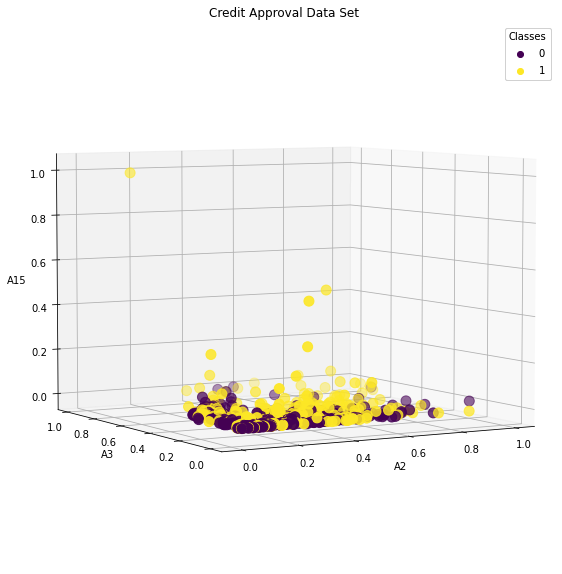

In [409]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

Y = data['A16']
xs = data['A2']
ys = data['A3']
zs = data['A15']

scatter = ax.scatter( xs, ys, zs, c=Y,s=100 )
ax.set_xlabel("А2")
ax.set_ylabel("А3")
ax.set_zlabel("А15")
ax.set_title("Credit Approval Data Set")
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.view_init( azim=-120, elev=5 )


6.	Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.


Регрессоры: 

⁃            Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

⁃            регрессия лассо (Lasso), параметр alpha в диапазоне от 0.5 до 1.5 

⁃            регрессия на основе деревьев решений (DecisionTreeRegressor), параметр max_leaf_nodes в диапазоне от 5 до 10 

In [410]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [411]:
data

,A2,A3,A8,A15,A16
0,0.256842,0.000000,1.25,0.00000,1.0
1,0.675489,0.159286,3.04,0.00560,1.0
2,0.161654,0.017857,1.50,0.00824,1.0
3,0.211729,0.055000,3.75,0.00003,1.0
4,0.096541,0.200893,1.71,0.00000,1.0
...,...,...,...,...,...
685,0.110226,0.360179,1.25,0.00000,0.0
686,0.134135,0.026786,2.00,0.00394,0.0
687,0.172932,0.482143,2.00,0.00001,0.0
688,0.062707,0.007321,0.04,0.00750,0.0


In [412]:
X1 = data['A2']
X2 = data['A3']
X3 = data['A15']

Y = data['A8']

In [413]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.3, random_state=666)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.3, random_state=666)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, test_size=0.3, random_state=666)


In [414]:
X1_train = X1_train.to_numpy().reshape(-1,1)
X1_test = X1_test.to_numpy().reshape(-1,1)
Y1_train = Y1_train.to_numpy().reshape(-1,1)
Y1_test = Y1_test.to_numpy().reshape(-1,1)

X2_train = X2_train.to_numpy().reshape(-1,1)
X2_test = X2_test.to_numpy().reshape(-1,1)
Y2_train = Y2_train.to_numpy().reshape(-1,1)
Y2_test = Y2_test.to_numpy().reshape(-1,1)

X3_train = X3_train.to_numpy().reshape(-1,1)
X3_test = X3_test.to_numpy().reshape(-1,1)
Y3_train = Y3_train.to_numpy().reshape(-1,1)
Y3_test = Y3_test.to_numpy().reshape(-1,1)

In [415]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

def TreeRegression(max_leaf_nodes=None):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("tree_reg", DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])

⁃            Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

In [416]:
poly_reg1 = PolynomialRegression(degree=3)
poly_reg2 = PolynomialRegression(degree=3)
poly_reg3 = PolynomialRegression(degree=3)

poly_reg1.fit(X1_train, Y1_train)
poly_reg2.fit(X2_train, Y2_train)
poly_reg3.fit(X3_train, Y3_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

⁃            регрессия лассо (Lasso), параметр alpha в диапазоне от 0.5 до 1.5

In [417]:
lasso_reg1 = LassoRegression(20, 0.7)
lasso_reg2 = LassoRegression(20, 0.7) 
lasso_reg3 = LassoRegression(20, 0.7)

lasso_reg1.fit(X1_train, Y1_train)
lasso_reg2.fit(X2_train, Y2_train)
lasso_reg3.fit(X3_train, Y3_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=0.7))])

⁃            регрессия на основе деревьев решений (DecisionTreeRegressor), параметр max_leaf_nodes в диапазоне от 5 до 10 

In [418]:
tree_reg1 = TreeRegression(7)
tree_reg2 = TreeRegression(7) 
tree_reg3 = TreeRegression(7)

tree_reg1.fit(X1_train, Y1_train)
tree_reg2.fit(X2_train, Y2_train)
tree_reg3.fit(X3_train, Y3_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('tree_reg', DecisionTreeRegressor(max_leaf_nodes=7))])

In [419]:
from sklearn.model_selection import GridSearchCV

param_grid_1 = [
    {
        "poly__degree": [i for i in range(2, 5)]
    },
]
param_grid_2 = [
    {
        "lasso_reg__alpha": [i for i in np.arange(0.5, 1.5)]
    },
]

param_grid_3 = [
    {
        "tree_reg__max_leaf_nodes": [i for i in range(5, 10)]
    },
]


In [420]:
grid_search1_1 = GridSearchCV(poly_reg1, param_grid_1, n_jobs=-1, verbose=1)
grid_search1_2 = GridSearchCV(poly_reg2, param_grid_1, n_jobs=-1, verbose=1)
grid_search1_3 = GridSearchCV(poly_reg3, param_grid_1, n_jobs=-1, verbose=1)

grid_search1_1.fit(X1_train, Y1_train)
grid_search1_2.fit(X2_train, Y2_train)
grid_search1_3.fit(X3_train, Y3_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                                       ('std_scaler', StandardScaler()),
                                       ('lin_reg', LinearRegression())]),
             n_jobs=-1, param_grid=[{'poly__degree': [2, 3, 4]}], verbose=1)

In [421]:
print(
    grid_search1_1.best_params_,
    grid_search1_2.best_params_,
    grid_search1_3.best_params_
)


{'poly__degree': 3} {'poly__degree': 4} {'poly__degree': 2}


In [422]:
grid_search2_1 = GridSearchCV(lasso_reg1, param_grid_2, n_jobs=-1, verbose=1)
grid_search2_2 = GridSearchCV(lasso_reg2, param_grid_2, n_jobs=-1, verbose=1)
grid_search2_3 = GridSearchCV(lasso_reg3, param_grid_2, n_jobs=-1, verbose=1)

grid_search2_1.fit(X1_train, Y1_train)
grid_search2_2.fit(X2_train, Y2_train)
grid_search2_3.fit(X3_train, Y3_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                                       ('std_scaler', StandardScaler()),
                                       ('lasso_reg', Lasso(alpha=0.7))]),
             n_jobs=-1, param_grid=[{'lasso_reg__alpha': [0.5]}], verbose=1)

In [423]:
print(
    grid_search2_1.best_params_,
    grid_search2_2.best_params_,
    grid_search2_3.best_params_
)

{'lasso_reg__alpha': 0.5} {'lasso_reg__alpha': 0.5} {'lasso_reg__alpha': 0.5}


In [424]:
grid_search3_1 = GridSearchCV(tree_reg1, param_grid_3, n_jobs=-1, verbose=1)
grid_search3_2 = GridSearchCV(tree_reg2, param_grid_3, n_jobs=-1, verbose=1)
grid_search3_3 = GridSearchCV(tree_reg3, param_grid_3, n_jobs=-1, verbose=1)

grid_search3_1.fit(X1_train, Y1_train)
grid_search3_2.fit(X2_train, Y2_train)
grid_search3_3.fit(X3_train, Y3_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('tree_reg',
                                        DecisionTreeRegressor(max_leaf_nodes=7))]),
             n_jobs=-1,
             param_grid=[{'tree_reg__max_leaf_nodes': [5, 6, 7, 8, 9]}],
             verbose=1)

In [425]:
print(
    grid_search3_1.best_params_,
    grid_search3_2.best_params_,
    grid_search3_3.best_params_
)

{'tree_reg__max_leaf_nodes': 5} {'tree_reg__max_leaf_nodes': 5} {'tree_reg__max_leaf_nodes': 5}



7.	Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.


In [426]:
labels=['PolynomialRegression', 'LassoRegression', 'LassoRegression']

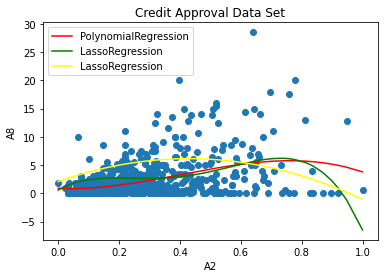

In [427]:
plt.scatter(X1, Y)
plt.plot(np.sort(X1), grid_search1_1.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='red',label=labels[0])
plt.plot(np.sort(X1), grid_search1_2.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='green',label=labels[1])
plt.plot(np.sort(X1), grid_search1_3.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='yellow',label=labels[2])
plt.title('Credit Approval Data Set')
plt.xlabel('A2')
plt.ylabel('A8')
plt.legend()
plt.show()

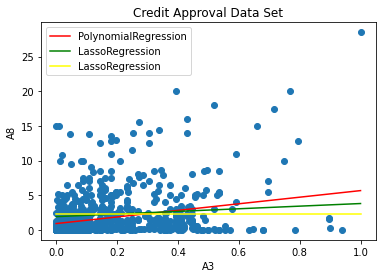

In [428]:
plt.scatter(X2, Y)
plt.plot(np.sort(X1), grid_search2_1.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='red',label=labels[0])
plt.plot(np.sort(X1), grid_search2_2.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='green',label=labels[1])
plt.plot(np.sort(X1), grid_search2_3.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='yellow',label=labels[2])
plt.title('Credit Approval Data Set')
plt.xlabel('A3')
plt.ylabel('A8')
plt.legend()
plt.show()

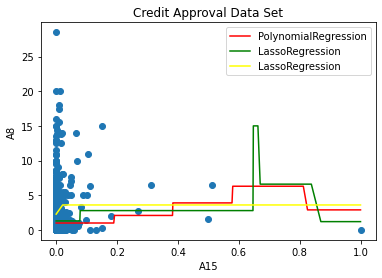

In [429]:
plt.scatter(X3, Y)
plt.plot(np.sort(X1), grid_search3_1.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='red',label=labels[0])
plt.plot(np.sort(X1), grid_search3_2.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='green',label=labels[1])
plt.plot(np.sort(X1), grid_search3_3.best_estimator_.predict(X1.values.reshape(-1,1))[np.argsort(X1)], color='yellow',label=labels[2])
plt.title('Credit Approval Data Set')
plt.xlabel('A15')
plt.ylabel('A8')
plt.legend()
plt.show()


8.	Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.


In [430]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error
train_score1, test_score1, train_score2, test_score2, train_score3, test_score3 = [], [], [], [], [], []

for i in range(1, 150):
# первый набор данных
poly_reg2.fit(X1_train[:i], Y1_train[:i])
Y_train_predict = poly_reg2.predict(X1_train[:i])
train_score0.append(max_error(Y1_train[:i], Y_train_predict))
Y_test_predict = poly_reg2.predict(X1_test)
test_score0.append(max_error(Y1_test, Y_test_predict))
# второй набор данных
lasso_reg1.fit(X2_train[:i], Y2_train[:i])
Y_train_predict = lasso_reg1.predict(X2_train[:i])
train_score1.append(max_error(Y2_train[:i], Y_train_predict))
Y_test_predict = lasso_reg1.predict(X2_test)
test_score1.append(max_error(Y2_test, Y_test_predict))
# третий набор данных
tree_reg3.fit(X2_train[:i], Y2_train[:i])
Y_train_predict = tree_reg3.predict(X2_train[:i])
train_score2.append(max_error(Y2_train[:i], Y_train_predict))
Y_test_predict = tree_reg3.predict(X2_test)
test_score2.append(max_error(Y2_test, Y_test_predict))

IndentationError: expected an indented block (1214641163.py, line 7)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(1, 150)], np.sqrt(train_score0), label="train 1", c='r')
plt.plot([i for i in range(1, 150)], np.sqrt(test_score0), ':', label="test 1", c='r
plt.plot([i for i in range(1, 150)], np.sqrt(train_score1), label="train 2", c='g')
plt.plot([i for i in range(1, 150)], np.sqrt(test_score1), ':', label="test 2", c='g
plt.plot([i for i in range(1, 150)], np.sqrt(train_score2), label="train 3", c='b')
plt.plot([i for i in range(1, 150)], np.sqrt(test_score2), ':', label="test 3", c='b
#максимальный показатель качества у признака 1 при регрессии SVM
plt.xlabel("Количество точек")
plt.ylabel("Качество обучения")
plt.title("Кривые обучения")
plt.legend()
plt.show()

SyntaxError: EOL while scanning string literal (4286757838.py, line 3)